#Assignment 2



An NOAA dataset has been stored in the file `weather.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.



## Synposis

I read the csv file called 'weather.csv' and I removed leap days for only the 2015 year period.  For the period year 2015 and not 2015 I: converted the named column 'Date' to a 'Date' data type; grouped by **'day of year'**; found the minimum and maximum each for **'day of year'**

## Processing

The aim is to take the max of the TMAX and the min of the TMIN records, for each day.  Here's the code to load modules and functions that are used later in the code - and to read the file 'weather.csv'

In [182]:
#1. step one - import pyplot and pandas, get the backend
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import datetime
import numpy as np

#2 - create use a function to get day of year from the the date column - this will be used later

def get_day_year(dataframe):
    dataframe['day_of_year'] = (dataframe['Date']
                                          .apply(lambda x: int(datetime.datetime.strftime(x,'%j'))))
    return dataframe

#3. create function to find the maximum for each day of the year - this will be used later

def get_max_day(dataframe):
    
    return (dataframe
          .loc[dataframe['Element']=='TMAX',:]
          .set_index('day_of_year')
          .groupby(level=0)['Data_Value']
        .agg(np.max))
#4. create function to find the minimum for each day of the year - this will be used later
def get_min_day(dataframe):
    return (dataframe
          .loc[dataframe['Element']=='TMIN',:]
          .set_index('day_of_year')
          .groupby(level=0)['Data_Value']
        .agg(np.min))

#5. replace the year from a Date data type - this will be used later to ensure every year has the same calender day
#, e.g. 1st march 2012 and 1st march 2013 have 60 as the calender day - otherwise they have different calender days
def change_date(dataframe, col_str):
        return miss_leap_days_not_2015['Date'].map(lambda x: x.replace(year=2015))
        
#6 - read the raw data

df = pd.read_csv('weather.csv')


Here's the code to find the maximum and minimum for each calender day.

In [246]:
#7 - change data type from string to date for the column Date

df["Date"] = pd.to_datetime(df["Date"])

#8 - remove the date 2015 from the dataframe df
df['year']=df['Date'].apply(lambda date: date.year)
not_2015_df = df[df['year']!=2015]

#9 - remove leap years from df
miss_leap_days_not_2015=not_2015_df[((not_2015_df['Date']!=pd.Timestamp("2008-02-29"))
                                     &(not_2015_df['Date']!=pd.Timestamp("2012-02-29")))]

#10 - replace years with the year '2015'.  this ensures corresponding day of year grouped by correctly, later

miss_leap_days_not_2015['Date'] = change_date(miss_leap_days_not_2015, 'Date')

#11 - get the calender day of the year using the get day of year function

miss_leap_days_not_2015= get_day_year(miss_leap_days_not_2015)

#12 - get the maximum for each calender day for the year not 2015

max_not_2015_df = get_max_day(miss_leap_days_not_2015)

#13 - get the minimum for each calender day for the year not 2015

min_not_2015_df = get_min_day(miss_leap_days_not_2015)
#9. step 9 - remove the dates other than 2015 in the dataframe df
df['year']=df['Date'].apply(lambda date: date.year)
df_2015 = df[df['year']==2015]

#10. - get the day of the year for the period 2015 using the function get_day_year function above

df_2015=get_day_year(df_2015)

#11 - get the minimum for each calender day for the year 2015
min_2015_df = get_min_day(df_2015)
#12 - get the maximum for each calender day for the year 2015
max_2015_df = get_max_day (df_2015)


C:\Users\Elias\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Elias\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [184]:
#13. get the backend
mpl.get_backend()

'nbAgg'

In [251]:
#14. make tuple list of minimum temps during 2015, minimum temps btwn 2005 & 2014, and the calender day
min_tuple = zip(min_2015_df.tolist(), min_not_2015_df.tolist(), list(range(1,366)))

def test_min(min_2015, not_2015_series, calender_day):
    if min_2015<not_2015_series[calender_day]:
        return True
    else:
        return False

def test_max(max_2015, not_2015_series, calender_day):
    if max_2015>not_2015_series[calender_day]:
        return True
    else:
        return False
#15. create a tuple list where the temp during 2015 are less than the temp btwn 2005 and 2014 for respective calender days
lessthan_before_2015 = [(min_2015, day) for min_2015, min_not2015, day in min_tuple if min_not2015>min_2015]

#16. unpack the tuple list into 2015 min temp - less than btwn 2005-2014  - and the calender day it happend
min_temp, day_broke_min = zip(*lessthan_before_2015)

#17. make tuple list of maximum temps during 2015, maximum temps btwn 2005 & 2014, and the calender day
max_tuple = zip(max_2015_df.tolist(), max_not_2015_df.tolist(), list(range(1,366)))

#15. create a tuple list where the temp during 2015 are more than the temp btwn 2005 and 2014 for respective calender days
morethan_before_2015 = [(max_2015, day) for max_2015, max_not2015, day in max_tuple if max_not2015<max_2015]

#16. unpack the tuple list into 2015 max temp - greater than btwn 2005-2014  - and the calender day it happend
max_temp, day_broke_max = zip(*morethan_before_2015)



<IPython.core.display.Javascript object>


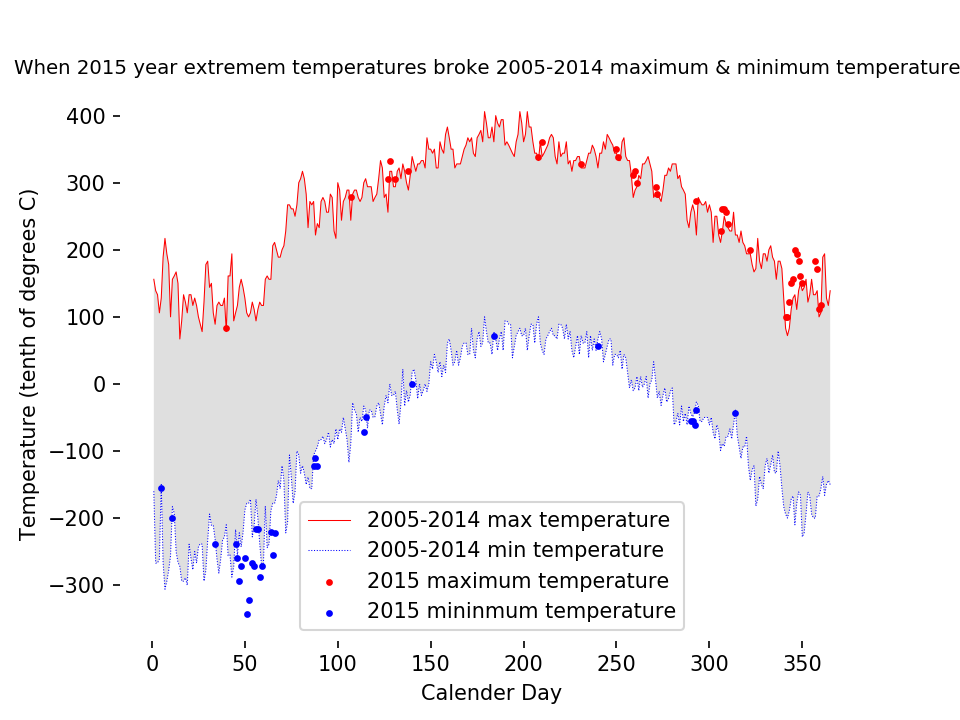

In [319]:
#14. draw two lines for maximum and minimum temperture and label graph
plt.figure()
#plt.plot(max_not_2015_df, '--', min_not_2015_df, '--')
plt.plot(max_not_2015_df, '-', color='red', linewidth=0.5, label='2005-2014 max temperature')
plt.plot(min_not_2015_df, ':', color='blue', linewidth=0.5, label='2005-2014 min temperature')

plt.xlabel('Calender Day')
plt.ylabel('Temperature (tenth of degrees C)')
#plt.subplots_adjust(top=0.72)

plt.title('When 2015 year extremem temperatures broke 2005-2014 maximum & minimum temperatures',fontsize = 9.5)
#15. create legend entries when we add the legend itself.
plt.legend(['2005-2014 maximum temperature', '2005-2014 minimum temperature'])

#16. highlight the difference between the blue and orange curves.
plt.gca().fill_between(range(1, 366), min_not_2015_df, max_not_2015_df, facecolor='grey', alpha=0.25)


#17. plot the scatter graph of 2015 max temp - greater than btwn 2005-2014  - the calender day it happend - on the same figure
plt.scatter(day_broke_max, max_temp, c='red', label='2015 maximum temperature', s=5)

#17. plot the scatter graph of 2015 min temp - less than btwn 2005-2014  - the calender day it happend - on the same figure
plt.scatter(day_broke_min, min_temp, c='blue', label='2015 mininmum temperature', s=5)

plt.legend()

for spine in plt.gca().spines.values():
    spine.set_visible(False)